In [16]:
from numpy import arange
from sklearn.datasets import make_circles
from matplotlib.pyplot import subplots


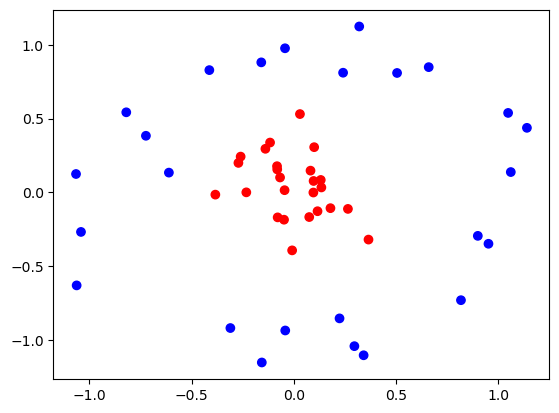

In [17]:
samples = 100

X, y = make_circles(n_samples=samples, factor=0.1, noise=0.2)

fig, ax = subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr');


# Stratified Shuffle Split

__Stratified shuffle split__ [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

n_splits  = 10

test_size = 0.9

RANDOM_STATE = 123

sss = StratifiedShuffleSplit(n_splits=n_splits, 
                             test_size=test_size,
                             random_state=RANDOM_STATE)


Index

9

Train samples:

[24 43 20 47  9]

Test samples

[ 2 18 35 38 48 19  0 39 14 46 23  4 45 32 30 27 17  1 21 49 10 33  7 36
 25 11 16 42 44 31 37 41 26 34 40 13  3  5  6 22 29  8 28 15 12]



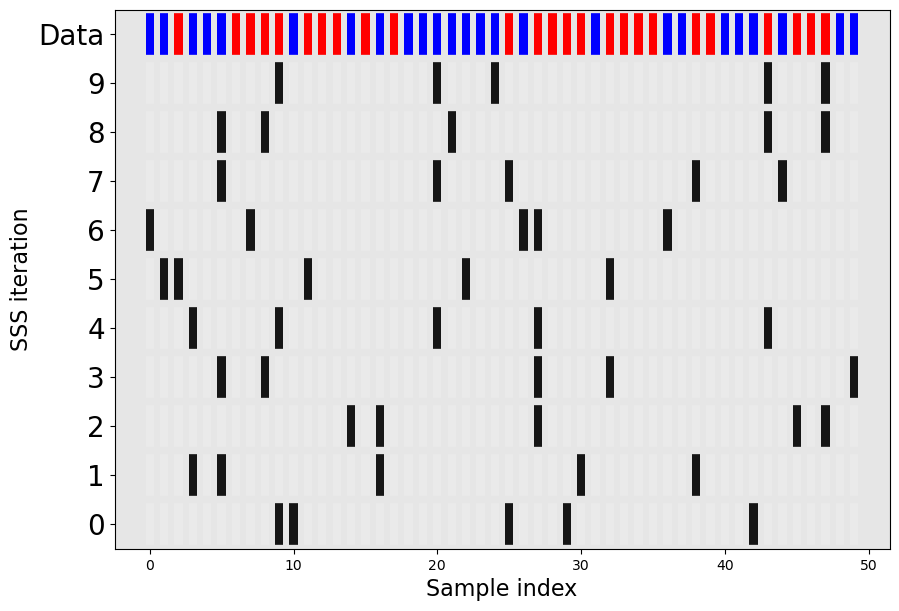

In [22]:
split_data_indices = sss.split(X=X, y=y)

fig, ax = subplots(figsize=[10, 7])

for index, (tr, tt) in enumerate(split_data_indices):

    if index == 9:
        
        print('Index', index, 'Train samples:', tr, 'Test samples', tt, sep='\n\n')

    indices = X[:, 0].copy()
    indices[tt] = 1
    indices[tr] = 0

    # Visualize the results
    x_axis = arange(indices.size)
    y_axis = [index + .5] * indices.size
    ax.scatter(x_axis, y_axis, c=indices, marker='_', lw=30, cmap='gray', vmin=-.1, vmax=1.1)

print('')

# Plot the data classes and groups at the end
class_y = [index + 1.5] * indices.size
ax.scatter(x_axis, class_y, c=y, marker='_', lw=30, cmap='bwr')

# Formatting
ylabels = list(range(n_splits))
ylabels.extend(['Data'])

ax.set_yticks(arange(n_splits + 1) + .5)
ax.set_yticklabels(ylabels, fontsize=20)
ax.set_xlabel('Sample index', fontsize=16)
ax.set_ylabel('SSS iteration', fontsize=16);

col = 0.9

ax.set_facecolor((col, col, col))
